In [43]:
# imports
import sys, os, json
import numpy as np
import pandas as pd
import seaborn as sns
import argparse, progressbar
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

sns.set()

In [44]:
# import the necessary packages

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, load_model

In [45]:
# generate the data

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

inputs = np.vstack((negative_samples,
                    positive_samples)).astype(np.float32)

In [46]:
# generate the labels
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype="float32"),
    np.ones((num_samples_per_class, 1), dtype="float32")
))

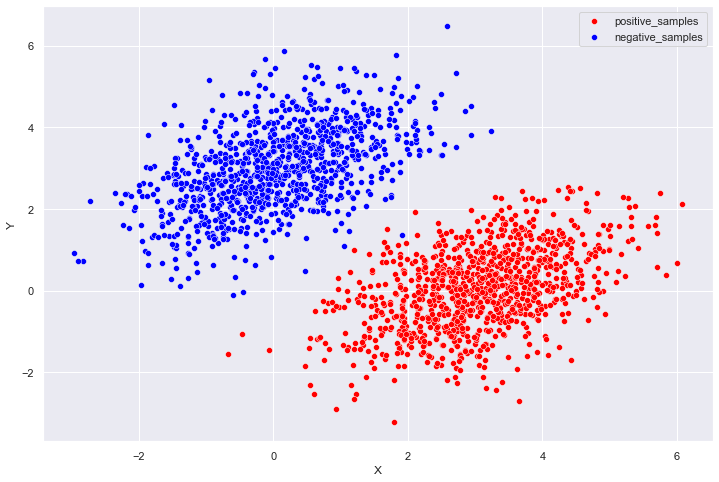

In [47]:
# lets plot the +ve and -ve points
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(12, 8))  # type: Figure, Axes
sns.scatterplot(x=positive_samples[:, 0], y=positive_samples[:, 1], label="positive_samples", color="red", ax=ax)
sns.scatterplot(x=negative_samples[:, 0], y=negative_samples[:, 1], label="negative_samples", color="blue", ax=ax)
ax.set_xlabel("X")
ax.set_ylabel("Y");

In [48]:
input_dimm = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dimm, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [49]:
# define the model
def model(inputs):
    return tf.matmul(inputs, W) + b

In [50]:
# constuct the loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [51]:
# training step
lr = 0.1


def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        preds = model(inputs)
        loss = square_loss(preds, targets)
    grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(lr * grad_loss_wrt_w)
    b.assign_sub(lr * grad_loss_wrt_b)
    return loss

In [52]:
# train the model
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"[INFO] loss at step: {step} : {loss:0.4f}......")

[INFO] loss at step: 0 : 3.0589......
[INFO] loss at step: 1 : 0.5651......
[INFO] loss at step: 2 : 0.1940......
[INFO] loss at step: 3 : 0.1320......
[INFO] loss at step: 4 : 0.1160......
[INFO] loss at step: 5 : 0.1073......
[INFO] loss at step: 6 : 0.1002......
[INFO] loss at step: 7 : 0.0938......
[INFO] loss at step: 8 : 0.0880......
[INFO] loss at step: 9 : 0.0827......
[INFO] loss at step: 10 : 0.0778......
[INFO] loss at step: 11 : 0.0734......
[INFO] loss at step: 12 : 0.0693......
[INFO] loss at step: 13 : 0.0656......
[INFO] loss at step: 14 : 0.0622......
[INFO] loss at step: 15 : 0.0591......
[INFO] loss at step: 16 : 0.0563......
[INFO] loss at step: 17 : 0.0537......
[INFO] loss at step: 18 : 0.0513......
[INFO] loss at step: 19 : 0.0491......
[INFO] loss at step: 20 : 0.0471......
[INFO] loss at step: 21 : 0.0453......
[INFO] loss at step: 22 : 0.0436......
[INFO] loss at step: 23 : 0.0421......
[INFO] loss at step: 24 : 0.0407......
[INFO] loss at step: 25 : 0.0395...

In [53]:
# plot the decision boundary
predictions = model(inputs).numpy()

In [54]:
predictions[np.where(predictions > 0.5)]
predictions.max()
predictions.min()

-0.4358156

In [68]:
# get the weights and biases so that we can plot the decision boundary
weights = W.numpy().ravel()
print(f"[INFO] weights : {weights}......")

bias = b.numpy()
print(f"[INFO] bias : {bias}......")

[INFO] weights : [ 0.18115169 -0.1198825 ]......
[INFO] bias : [0.3769097]......


The line is in the for of $W_2X_2 + W_1X_1 + b = 0$ or if rearranged can be expressed as $X_2 = (-W_1/W_2)X_1 -b/W_2$

In [73]:
# finding the grad and coeffs of the line
line_grad = -weights[0] / weights[1]
line_coeff = (-bias[0] + 0.5) / weights[1]
print(f"[INFO] line_grad: {line_grad} and line_coeff: {line_coeff}......")

[INFO] line_grad: 1.5110769271850586 and line_coeff: -1.0267578276852403......


In [74]:
# now plot the line in the range of existing points
x1 = np.linspace(start=inputs[:, 0].min(),
                 stop=inputs[:, 1].max(),
                 num=1000)
x2 = line_grad * x1 + line_coeff

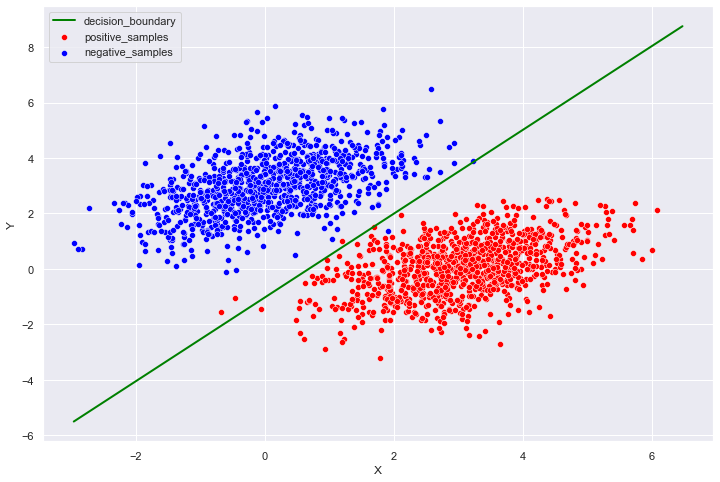

In [75]:
# lets plot the +ve and -ve points overlaid with model line
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(12, 8))  # type: Figure, Axes
sns.scatterplot(x=positive_samples[:, 0], y=positive_samples[:, 1], label="positive_samples", color="red", ax=ax)
sns.scatterplot(x=negative_samples[:, 0], y=negative_samples[:, 1], label="negative_samples", color="blue", ax=ax)
sns.lineplot(x=x1, y=x2,label="decision_boundary",color="green", linewidth=2,ax=ax)
ax.set_xlabel("X")
ax.set_ylabel("Y");